In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.linear_model as linear_model
from sklearn.linear_model import LinearRegression
from matplotlib.ticker import FormatStrFormatter
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [3]:
df = pd.read_csv('./train.csv')
submit = pd.read_csv('./test.csv')

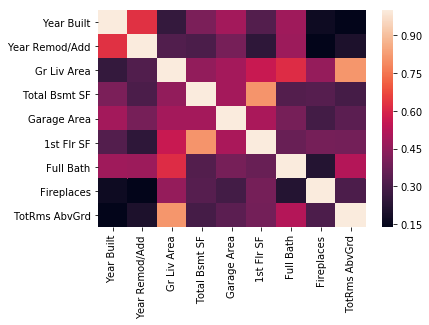

In [14]:
df.corrwith(df['SalePrice']).sort_values(ascending = False)
#General idea of which columns correlated strongly with SalePrice

features = ['Year Built','Year Remod/Add','Gr Liv Area'
         ,'Total Bsmt SF','Garage Area','1st Flr SF', 'Full Bath','Fireplaces','TotRms AbvGrd']

sns.heatmap(df[features].corr())

#Model 1 correlations between predictors

In [3]:
df['Garage Finish'].fillna('None', inplace = True)
df['Garage Qual'].fillna('None', inplace = True)
df['Garage Finish'].fillna('None', inplace = True)
df['Garage Type'].fillna('None', inplace = True)
df['Garage Cond'].fillna('None', inplace = True)
df['Bsmt Exposure'].fillna('None', inplace = True)
df['BsmtFin Type 2'].fillna('None', inplace = True)
df['BsmtFin Type 1'].fillna('None', inplace = True)
df['Bsmt Cond'].fillna('None', inplace = True)
df['Bsmt Qual'].fillna('None', inplace = True)
df['Mas Vnr Type'].fillna('None', inplace = True)
df.drop(['Pool QC','Misc Feature','Alley','Fence','Fireplace Qu'], axis = 1, inplace = True)
df['Garage Cars'].fillna(0, inplace=True)
df['Garage Area'].fillna(0, inplace=True)
df['Total Bsmt SF'].fillna(0, inplace = True)
df['BsmtFin SF 1'].fillna(0, inplace = True)
df['Lot Frontage'].fillna(0, inplace = True)
df['Bsmt Full Bath'].fillna(0, inplace = True)
df['Bsmt Unf SF'].fillna(0, inplace = True)
df['Bsmt Half Bath'].fillna(0, inplace = True)
df['Mas Vnr Area'].fillna(0, inplace = True)
df['BsmtFin SF 2'].fillna(0, inplace = True)
submit['Lot Frontage'].fillna(0, inplace = True)
submit['Mas Vnr Area'].fillna(0, inplace = True)

#Dropping and cleaning a variety of test predictors,  many of these were used during my modeling stage.

In [16]:
numeric = df._get_numeric_data()
num_cols = df._get_numeric_data().drop(['Id','PID'], axis = 1).columns
num_cols.shape

categorical = df.select_dtypes(exclude=["number","bool_"]).columns

numeric_sub = submit._get_numeric_data
num_cols_sub = submit._get_numeric_data().columns

#Numeric and Categorical columns for a general test including nearly all predictors

In [17]:
features= num_cols_sub

In [23]:
dummies = pd.get_dummies(df[categorical])

In [24]:
dummies.corrwith(df['SalePrice']).sort_values(ascending = False)
#Corr_test = dummies.drop(features,axis = 1, inplace = True)

Bsmt Qual_Ex            0.586497
Kitchen Qual_Ex         0.551284
Foundation_PConc        0.529047
Exter Qual_Ex           0.493861
BsmtFin Type 1_GLQ      0.463549
Heating QC_Ex           0.453255
Neighborhood_NridgHt    0.448647
Exter Qual_Gd           0.446685
Garage Finish_Fin       0.422936
Fireplace Qu_Gd         0.384732
Bsmt Exposure_Gd        0.377032
Sale Type_New           0.358102
Garage Type_Attchd      0.357879
Exterior 1st_VinylSd    0.342146
Exterior 2nd_VinylSd    0.337563
Mas Vnr Type_Stone      0.310026
Kitchen Qual_Gd         0.306246
Paved Drive_Y           0.289210
Central Air_Y           0.277378
Lot Shape_IR1           0.273574
Garage Cond_TA          0.271846
Roof Style_Hip          0.265224
Neighborhood_NoRidge    0.263395
Mas Vnr Type_BrkFace    0.257901
Neighborhood_StoneBr    0.256977
Electrical_SBrkr        0.254044
Garage Qual_TA          0.249773
Fireplace Qu_Ex         0.234525
MS Zoning_RL            0.231468
Bsmt Qual_Gd            0.226836
          

In [18]:
dummies_features = ['Foundation_PConc','BsmtFin Type 1_GLQ','Neighborhood_NridgHt',
         'Exter Qual_Gd','Bsmt Exposure_Gd','Sale Type_New','Garage Type_Attchd','Exterior 1st_VinylSd',
         'Exterior 2nd_VinylSd','Mas Vnr Type_Stone','Kitchen Qual_Gd','Paved Drive_Y','Central Air_Y','Garage Cond_TA',
         'Roof Style_Hip','Neighborhood_NoRidge','Mas Vnr Type_BrkFace','Neighborhood_StoneBr','Electrical_SBrkr',
                'MS Zoning_RM','Bsmt Exposure_No','Lot Shape_Reg','Heating QC_TA','Foundation_CBlock',
                'Garage Type_Detchd','Mas Vnr Type_None','Garage Finish_Unf','Bsmt Qual_TA','Kitchen Qual_TA','Exter Qual_TA']

In [ ]:
#df_corr = df.corrwith(df['SalePrice'])

In [ ]:
#sorted_df_corr = df_corr.sort_values(ascending = False)

#sorted_df_corr

In [ ]:
#grid_params = {
 #   'n_neighbors': range (1,10),
  #  'metric':['euclidean','manhattan']
#}

#gs = GridSearchCV(
  #  LinearRegression(),
 #   grid_params,)

#gs_results = gs.fit(X_train,y_train)

In [6]:
X = df[features]
X.drop(['Garage Yr Blt'], axis = 1, inplace = True)
X_submit = submit[features]
X_submit.drop(['Garage Yr Blt'], axis = 1, inplace = True)
y = df['SalePrice']

C:\Users\tbaca\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
#pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#pf = pf.fit(X)
#X = pf.transform(X)

#X = pd.DataFrame(X)

In [ ]:
#pf = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
#pf = pf.fit(X_submit)
#X_submit = pf.transform(X_submit)

#X_submit = pd.DataFrame(X_submit)

In [9]:
dummies = pd.get_dummies(df,columns =categorical,drop_first = True)
submit_dummies = pd.get_dummies(submit,columns =categorical, drop_first = True)


In [ ]:
#X[['Overall Qual_2','Overall Qual_3',
             # 'Overall Qual_4','Overall Qual_5','Overall Qual_6',
              #'Overall Qual_7','Overall Qual_8','Overall Qual_9','Overall Qual_10']] = df[['Overall Qual_2','Overall Qual_3',
              #'Overall Qual_4','Overall Qual_5','Overall Qual_6',
              #'Overall Qual_7','Overall Qual_8','Overall Qual_9','Overall Qual_10']]

In [ ]:
#X_submit[['Overall Qual_2','Overall Qual_3',
              #'Overall Qual_4','Overall Qual_5','Overall Qual_6',
              #'Overall Qual_7','Overall Qual_8','Overall Qual_9','Overall Qual_10']] = submit[['Overall Qual_2','Overall Qual_3',
              #'Overall Qual_4','Overall Qual_5','Overall Qual_6',
              #'Overall Qual_7','Overall Qual_8','Overall Qual_9','Overall Qual_10']]

In [13]:
submit_dummies_final = submit_dummies[dummies_features]
dummies_final = dummies[dummies_features]

X.shape

(2051, 37)

In [14]:
X_submit=pd.concat([X_submit,submit_dummies_final],axis = 1)
X=pd.concat([X,dummies_final],axis = 1)

In [ ]:
#X.shape

In [ ]:
#ss = StandardScaler()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [ ]:
#X_train_scaled = ss.fit_transform(X_train)
#X_test_scaled = ss.transform(X_test)

In [ ]:
X.shape

In [15]:
lm = linear_model.LinearRegression()

model = lm.fit(X,y)

predictions  =  model.predict(X_submit)
score        =  model.score(X,y)
betacoef     =  model.coef_

In [16]:
score

0.883830067761247

In [ ]:
X_submit_scaled=ss.fit_transform(X_submit)

submit['SalePrice'] = predictions



submission10 = submit[['Id','SalePrice']]

submission10.to_csv("Submission10.csv")

#Submission process